In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from sectorizedradialprofile.calculate_radial_profile import CalculateRadialProfile
from sectorizedradialprofile.calculate_radial_profile import load_label_analysis_amira
import matplotlib.pyplot as plt
from skimage import io

In [2]:
%matplotlib notebook

Load the data

In [3]:
data_3d = io.imread('data3d_for_test.tif')

In [4]:
data_3d.shape

(521, 194, 192)

Visualize data

<IPython.core.display.Javascript object>


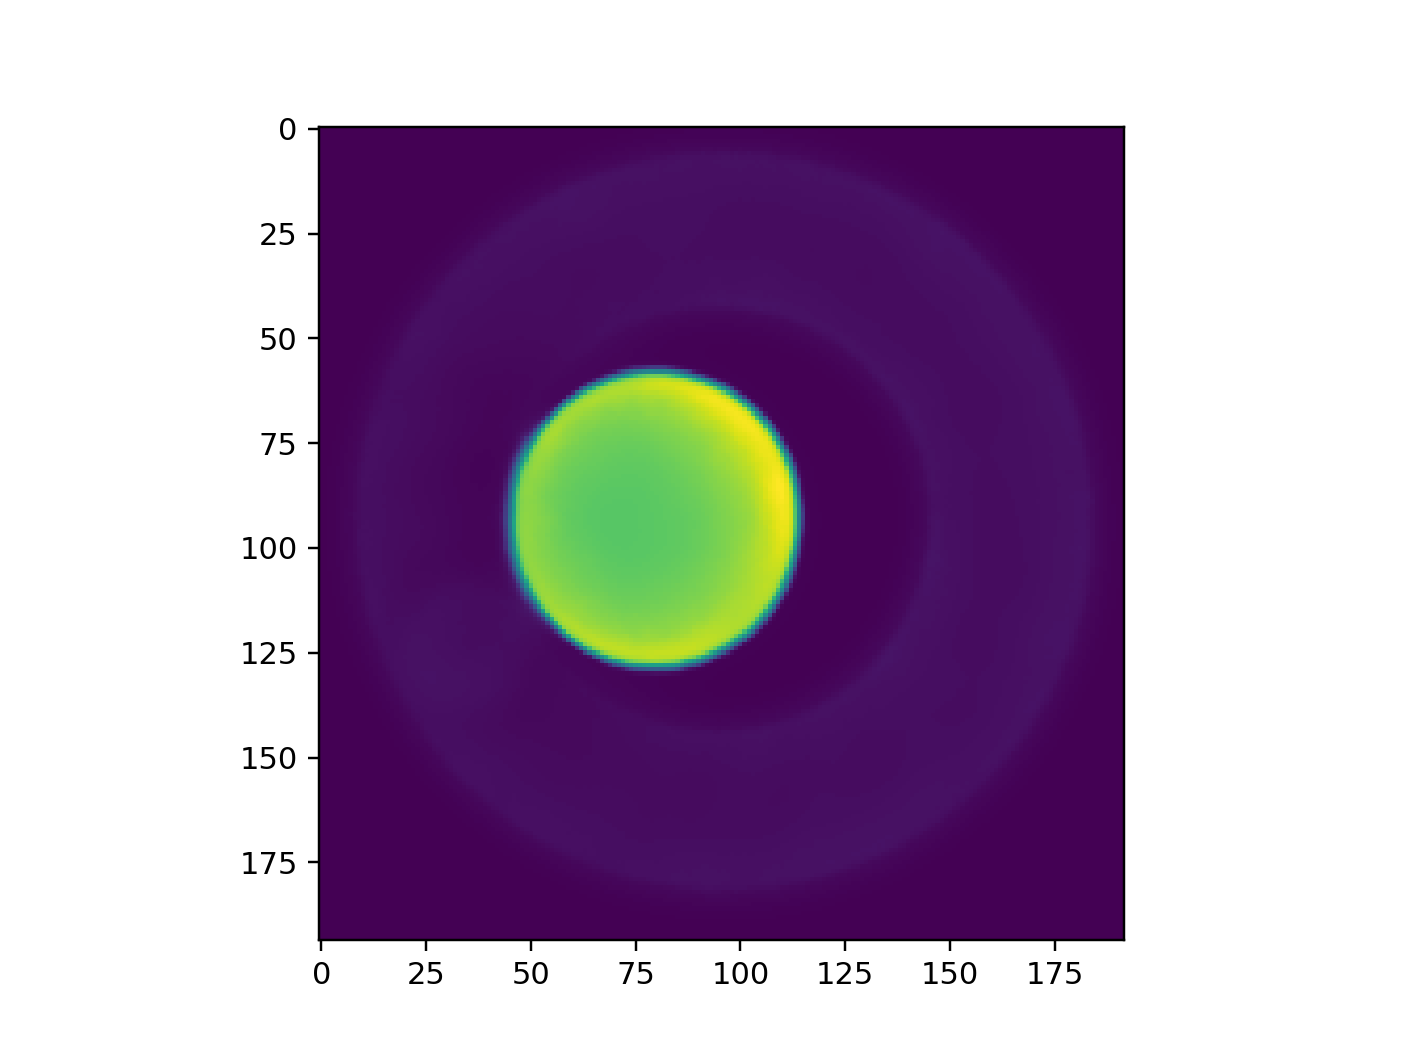

<IPython.core.display.Javascript object>


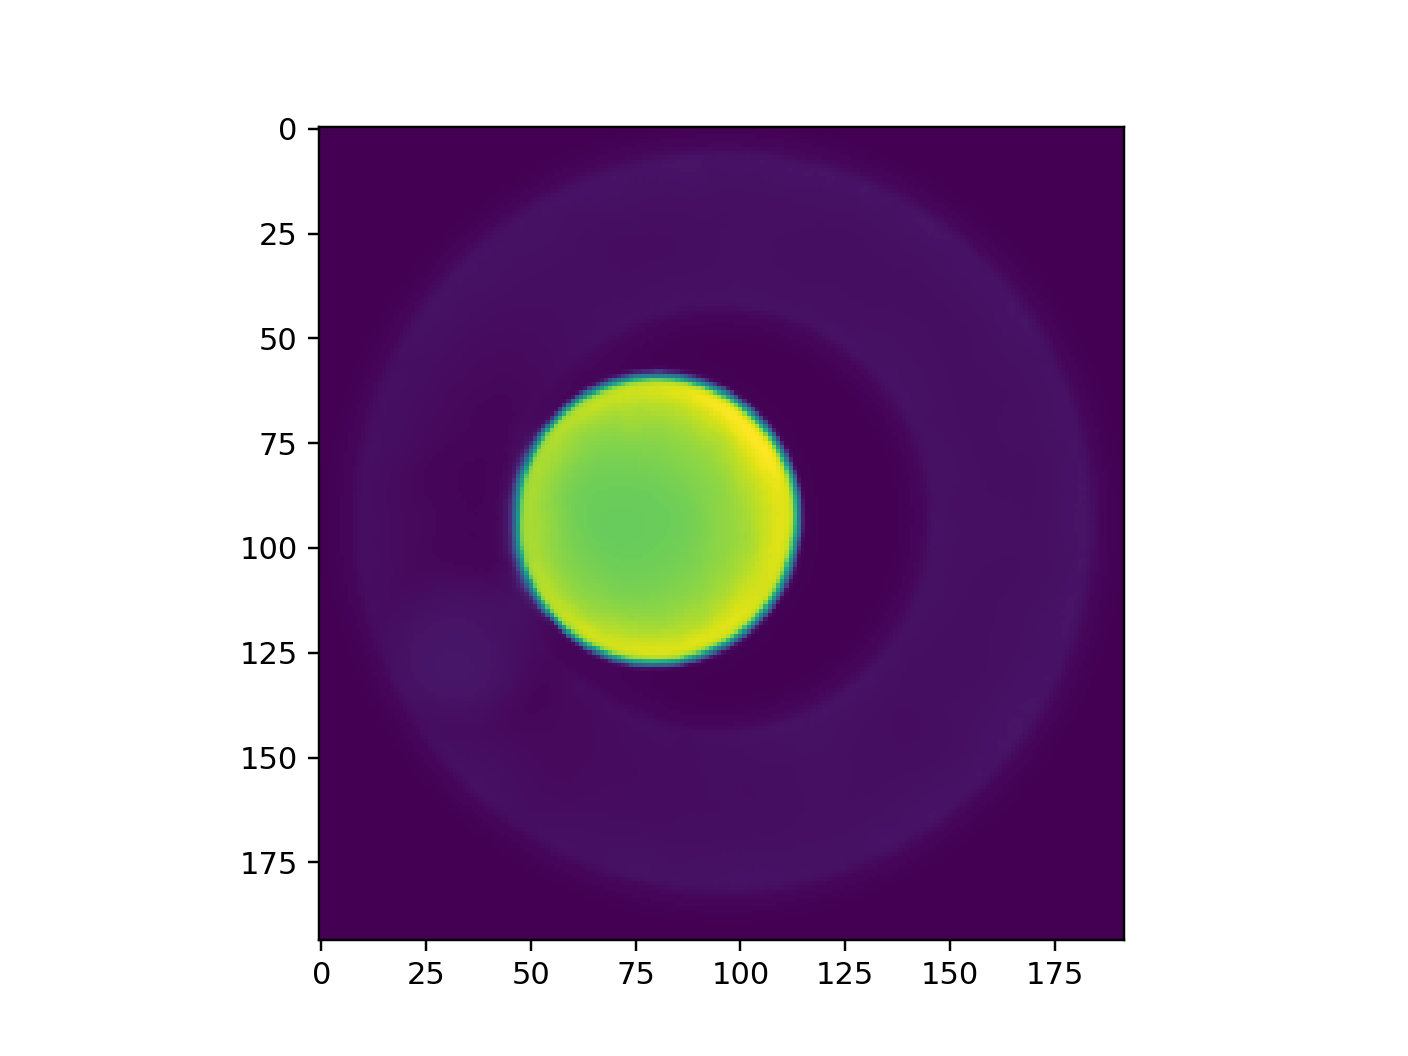

In [5]:
plt.figure(0)
plt.imshow(data_3d[50])
plt.figure(1)
plt.imshow(data_3d[58])

Single sphere calculation (3D)

In [6]:
center_3d = (79, 93, 50)
radius = 45
angle_range = None
o_profile_3d_s = CalculateRadialProfile(data=data_3d)
o_profile_3d_s.add_params(center=center_3d, radius=radius, angle_range=angle_range)
o_profile_3d_s.calculate()

2D calculation of a single slice at center

In [7]:
data_2d = io.imread('data2d_for_test_1.tif')
center_2d = (79, 93)
o_profile_2d = CalculateRadialProfile(data=data_2d)
o_profile_2d.add_params(center=center_2d, radius=radius, angle_range=angle_range)
o_profile_2d.calculate()

Plot to compare

<IPython.core.display.Javascript object>


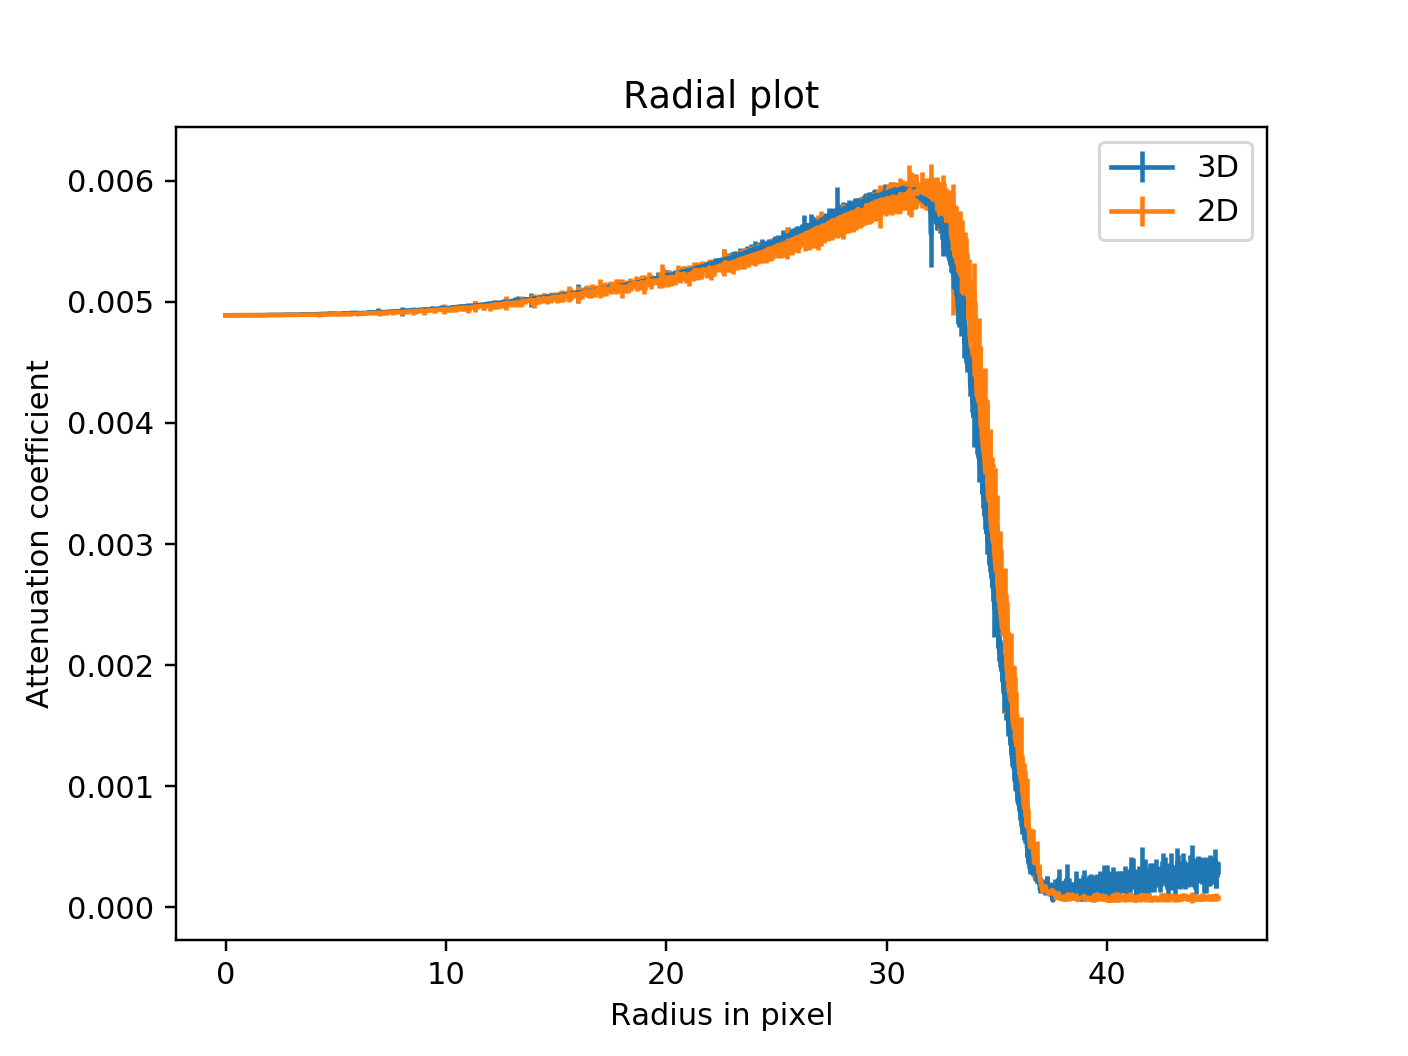

In [8]:
df_3d_s = o_profile_3d_s.radial_profile
profile_2d = o_profile_2d.radial_profile
plt.figure(2)
plt.errorbar(x=df_3d_s.index, y=df_3d_s['mean'], yerr=df_3d_s['sem'], label='3D')
plt.errorbar(x=profile_2d.index, y=profile_2d['mean'], yerr=profile_2d['sem'], label='2D')

plt.xlabel('Radius in pixel')
plt.ylabel('Attenuation coefficient')
plt.title('Radial plot')
plt.legend()

Multiple spheres calculation (3D)

In [9]:
param_dict = load_label_analysis_amira(
    'Label-Analysis_Amira.csv', # Output file from Amira-Avizo's Label-Analysis.
    drop=0, # Can be used to drop rows by index. Here '0' is used to remove on highly irragular sphere
    z_flipper=520  # Optional to flip the z coordinate. Here '520' is used to correct the volume manipulation performed using Amira, normaly, this can be 'None'
)
param_dict  # formated dictionary containing 'center' as '(x0, y, z0)' and 'radius' as 'number'

   EqDiameter  EqRadius   Area3d  Volume3d      Mean    Stddev  Majority  \
0     68.8754  34.43770  14963.7    171077  0.004730  0.001073  0.005045   
1     76.3311  38.16555  18394.4    232864  0.005038  0.001128  0.005038   
2     68.5070  34.25350  14818.1    168346  0.004702  0.001078  0.004575   
3     68.0892  34.04460  14666.3    165285  0.004632  0.001034  0.004842   
4     74.9005  37.45025  17847.8    220015  0.005082  0.001219  0.005037   
5     66.7967  33.39835  14127.1    156050  0.004664  0.001104  0.004919   
6     70.6225  35.31125  15754.0    184428  0.004493  0.000982  0.004654   
7     71.4270  35.71350  16093.2    190803  0.005074  0.001196  0.005500   

    Maximum  Minimum  BaryCenterX  BaryCenterY  BaryCenterZ  Sphericity  index  
0  0.006488   0.0008      86.0984      85.8381     471.8042    0.995951      2  
1  0.007540   0.0008      80.2334      96.1949     402.9170    0.995100      3  
2  0.006579   0.0008     102.9410     109.8360     340.6620    0.995005 

{'obj_2': [(86.0, 86.0, 472.0), 34.0],
 'obj_3': [(80.0, 96.0, 403.0), 38.0],
 'obj_4': [(103.0, 110.0, 341.0), 34.0],
 'obj_5': [(78.0, 90.0, 284.0), 34.0],
 'obj_6': [(106.0, 105.0, 226.0), 37.0],
 'obj_7': [(80.0, 85.0, 169.0), 33.0],
 'obj_8': [(109.0, 99.0, 110.0), 35.0],
 'obj_9': [(79.0, 93.0, 50.0), 36.0]}

In [11]:
o_profile_3d_m = CalculateRadialProfile(data=data_3d)
for each in param_dict.keys():
    o_profile_3d_m.add_params(center=param_dict[each][0], radius=radius, angle_range=angle_range)
o_profile_3d_m.calculate()

<IPython.core.display.Javascript object>


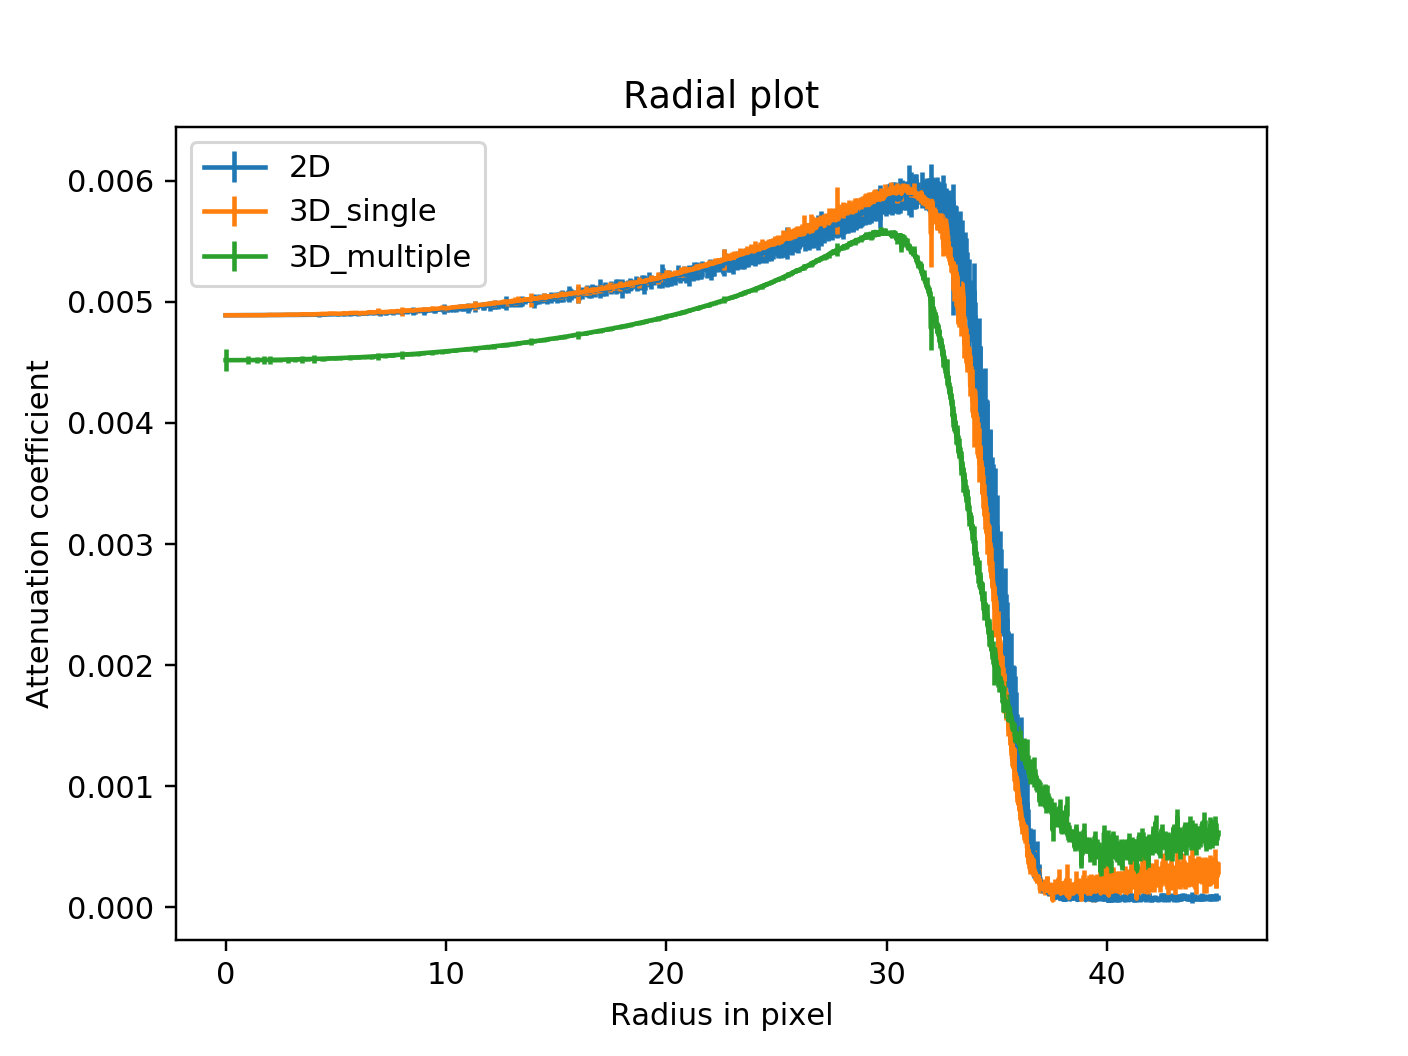

In [12]:
df_3d_m = o_profile_3d_m.radial_profile
plt.figure(3)
plt.errorbar(x=profile_2d.index, y=profile_2d['mean'], yerr=profile_2d['sem'], label='2D')
plt.errorbar(x=df_3d_s.index, y=df_3d_s['mean'], yerr=df_3d_s['sem'], label='3D_single')
plt.errorbar(x=df_3d_m.index, y=df_3d_m['mean'], yerr=df_3d_m['sem'], label='3D_multiple')
plt.xlabel('Radius in pixel')
plt.ylabel('Attenuation coefficient')
plt.title('Radial plot')
plt.legend()